In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## **analysis**

In [92]:
wine = pd.read_csv("winequality-red.csv")

In [93]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## **scaling**

In [94]:
scaler = StandardScaler()

In [95]:
scaled_wine = scaler.fit_transform(wine[wine.drop('quality', axis=1).columns])
wine[wine.drop('quality', axis=1).columns] = scaled_wine
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


## **train/test/split**

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = wine["quality"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

## **forest**

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc = RandomForestClassifier(n_estimators=500)

In [101]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

## forest predict + eval

In [102]:
rfc_predict= rfc.predict(X_test)
rfc_predict

array([5, 5, 5, 7, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6,
       7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 8, 7, 7, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6,
       6, 6, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 7, 6, 5, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5,
       6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 7, 5, 6, 5, 5,
       6, 7, 5, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 7, 5, 5,
       5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 5, 6, 8, 5, 6, 5, 5, 7,

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [114]:
accuracy_score(y_test, rfc_predict)

0.6520833333333333

In [115]:
confusion_matrix(y_test, rfc_predict)

array([[  0,   0,   5,   0,   0,   0],
       [  0,   0,  14,   5,   0,   0],
       [  0,   1, 160,  46,   1,   0],
       [  0,   1,  39, 124,  16,   0],
       [  0,   0,   1,  33,  28,   1],
       [  0,   0,   0,   1,   3,   1]], dtype=int64)

In [116]:
precision_score(y_test, rfc_predict, average="weighted")

C:\Users\afkjh\DataspellProjects\untitled\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6208494347767509

In [117]:
recall_score(y_test, rfc_predict, average="weighted")

0.6520833333333333

## **logistic**

In [111]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [113]:
logmodel_predict= logmodel.predict(X_test)
logmodel_predict

array([5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 5, 6, 6,
       6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 7, 7, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 5, 7, 5, 6, 5, 5, 6, 5, 5, 6,
       5, 5, 7, 6, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5,
       7, 6, 5, 7, 5, 6, 6, 7, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 7, 5, 6, 7,
       7, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 7, 5, 6, 5, 5,
       5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 7, 5, 7, 5, 6,
       5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7,

In [118]:
accuracy_score(y_test, logmodel_predict)

0.5666666666666667

In [119]:
confusion_matrix(y_test, logmodel_predict)

array([[  0,   1,   4,   0,   0,   0],
       [  0,   0,   8,  10,   1,   0],
       [  2,   1, 147,  54,   4,   0],
       [  0,   0,  50, 105,  24,   1],
       [  0,   0,   3,  40,  20,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

In [120]:
precision_score(y_test, logmodel_predict, average="weighted")

0.5376734184239733

In [121]:
recall_score(y_test, logmodel_predict, average="weighted")

0.5666666666666667

## **KNN**

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier(n_neighbors=8)

In [148]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [149]:
knn_predict = knn.predict(X_test)
knn_predict

array([5, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       7, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 7, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 6, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 6, 5, 7, 4, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 6, 4, 6,
       5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       7, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 7, 6, 6,
       6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 7, 5, 6, 6, 5,
       6, 7, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 7,

In [150]:
accuracy_score(y_test, knn_predict)

0.5833333333333334

In [151]:
confusion_matrix(y_test, knn_predict)

array([[  0,   1,   2,   2,   0,   0],
       [  0,   0,  13,   5,   1,   0],
       [  0,   5, 144,  55,   4,   0],
       [  0,   0,  48, 112,  20,   0],
       [  0,   0,   6,  33,  24,   0],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

In [152]:
precision_score(y_test, knn_predict, average="weighted")

C:\Users\afkjh\DataspellProjects\untitled\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5544916073548394

In [153]:
recall_score(y_test, knn_predict, average="weighted")

0.5833333333333334

In [136]:
error_mean =[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_mean.append(np.mean(pred_i != y_test))

error_mean

[0.41041666666666665,
 0.44375,
 0.46875,
 0.4270833333333333,
 0.42083333333333334,
 0.42291666666666666,
 0.425,
 0.4166666666666667,
 0.4354166666666667,
 0.42083333333333334,
 0.4354166666666667,
 0.4270833333333333,
 0.4375,
 0.4395833333333333,
 0.4395833333333333,
 0.4395833333333333,
 0.44375,
 0.45625,
 0.46041666666666664]

In [138]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

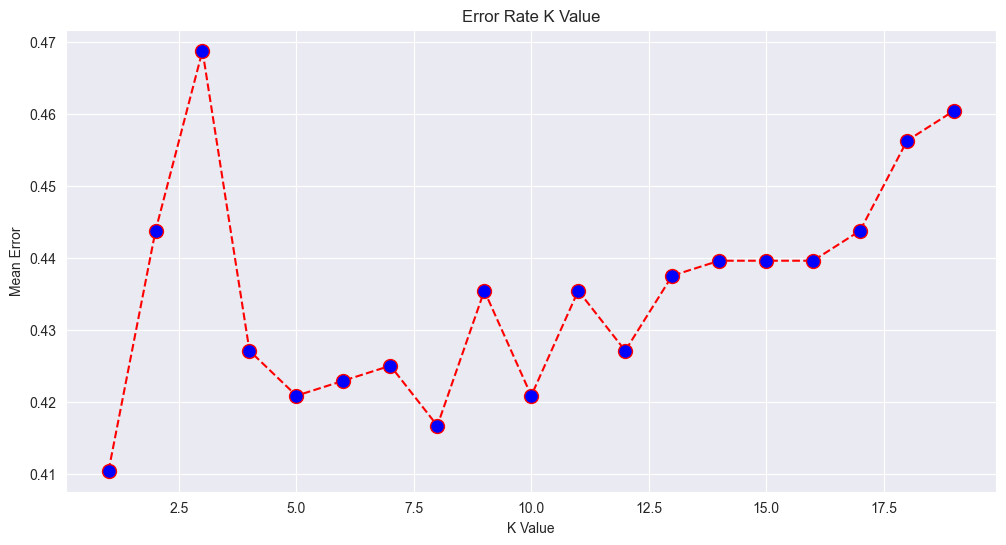

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_mean, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')